<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

Real random number generators use random physical processes (e.g. radioactivity or noise in circuits) to generate random numbers. However, some algorithms can produce a stream of numbers that approximate real random numbers. Because a deterministic algorithm generates these numbers, some argue that these RNG are not ‘truly’ random. So we call them pseudo RNG (PRNG).

Every time we use a PRNG, it gives us a new number. However, one of the drawbacks of PRNG is that the numbers begin to repeat once you have drawn enough numbers. Luckily, modern PRNG algorithms are so sophisticated that it takes (for a PRNG called the Mersenne Twister) about $10^{19937} - 1$ times before the numbers repeat. This is good enough for us and most simulations.

Typical PRNG produces uniformly distributed numbers between 0 and 1. Let’s try to see what this means using NumPy.

### 1.2 NumPy’s PRNG

In [1]:
np.random.rand()                # Give one number

0.6417102084022743

In [2]:
np.random.rand(10)              # Give ten numbers, results in an array

array([0.99934573, 0.88803447, 0.1095022 , 0.6014133 , 0.11114408,
       0.54595781, 0.30555893, 0.49700227, 0.58195731, 0.53930859])

In [3]:
np.random.rand(5,2)             # Give five sets of 2, 2D arrays

array([[0.89042581, 0.31477222],
       [0.36942067, 0.1646735 ],
       [0.90646967, 0.21380901],
       [0.22079472, 0.18727323],
       [0.52800686, 0.02549982]])

1. All the numbers are between 0 and 1.
2. The numbers are (more or less) evenly (i.e. uniformly) distributed to cover the interval between 0 and 1.

In [5]:
n = 10000
random_numbers = np.random.rand(n)

50.690000000000005

In [7]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

50.690000000000005

In [6]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.119999999999997

In [8]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

24.21

### 1.3 A simple graphical test

In [1]:
from matplotlib import pyplot as plt

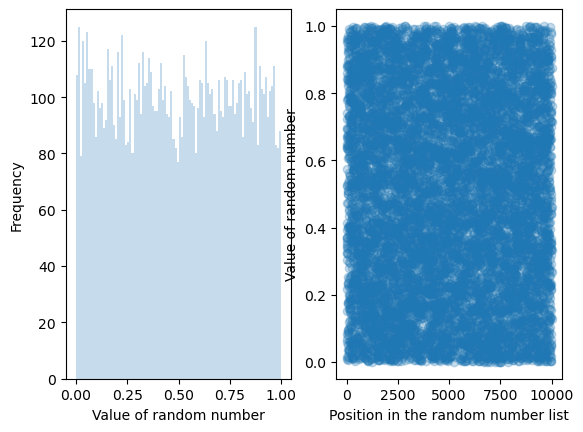

In [12]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.show()

### 1.4 Uniformly beyond \([0,1)\)

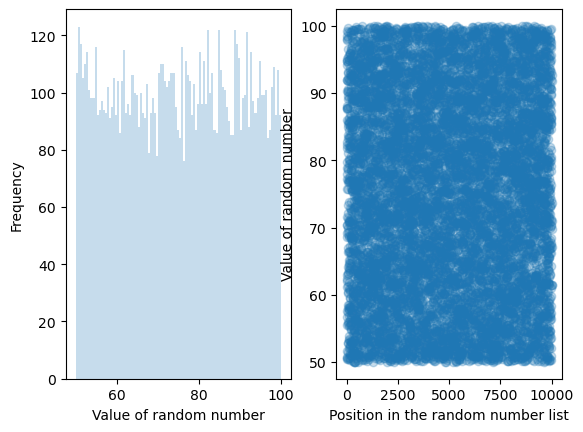

In [13]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.show()

### 1.5 ‘seeding’ a PRNG

In [14]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([95, 21, 60, 61, 59, 10, 30, 31, 78, 64])

In [15]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([99, 38, 82, 74, 35, 73, 70, 55, 65, 45])

In [16]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [17]:
np.random.seed(1234)              # Seed must be a non-negative integer
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [20]:
np.random.seed(12.34)

TypeError: Cannot cast scalar from dtype('float64') to dtype('int64') according to the rule 'safe'

In [21]:
np.random.seed(-1234)

ValueError: Seed must be between 0 and 2**32 - 1

## 2 Simulating a Magic-8 Ball

In [22]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']
    
    return np.random.choice(options)

In [23]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



In [24]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: As I see it, yes.

Q: Will I be rich?
A: My reply is no.

Q: Will I be in trouble?
A: Signs point to yes.



In [28]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']
    
    np.random.seed(8)
    return np.random.choice(options)

In [33]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Yes definitely.

Q: Will I be rich?
A: Yes definitely.

Q: Will I be in trouble?
A: Yes definitely.



In [30]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Yes definitely.

Q: Will I be rich?
A: Yes definitely.

Q: Will I be in trouble?
A: Yes definitely.



In [36]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']
    
    
    return np.random.choice(options)

In [39]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for i in range(len(questions)):
    np.random.seed(8+i)
    print(f'Q: {questions[i]}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Yes definitely.

Q: Will I be rich?
A: It is decidedly so.

Q: Will I be in trouble?
A: Signs point to yes.



In [40]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for i in range(len(questions)):
    np.random.seed(9+i)
    print(f'Q: {questions[i]}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: It is decidedly so.

Q: Will I be rich?
A: Signs point to yes.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [41]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [42]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Tails', 'Tails', 'Head', 'Tails', 'Tails', 'Head',
       'Head', 'Tails', 'Head'], dtype='<U5')

In [6]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [44]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 49.50%


### 3.2 A biased coin

In [46]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 70.60%


### 3.3 A flipping experiment

In [7]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]   # List comprehension. _ is used because 
no_of_heads, heads_counts = np.unique(result, return_counts=True)     # we don't need any variables. Using a 
heads_probability = heads_counts/no_of_repeats                        # variable (eg. i) also works.

In [10]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

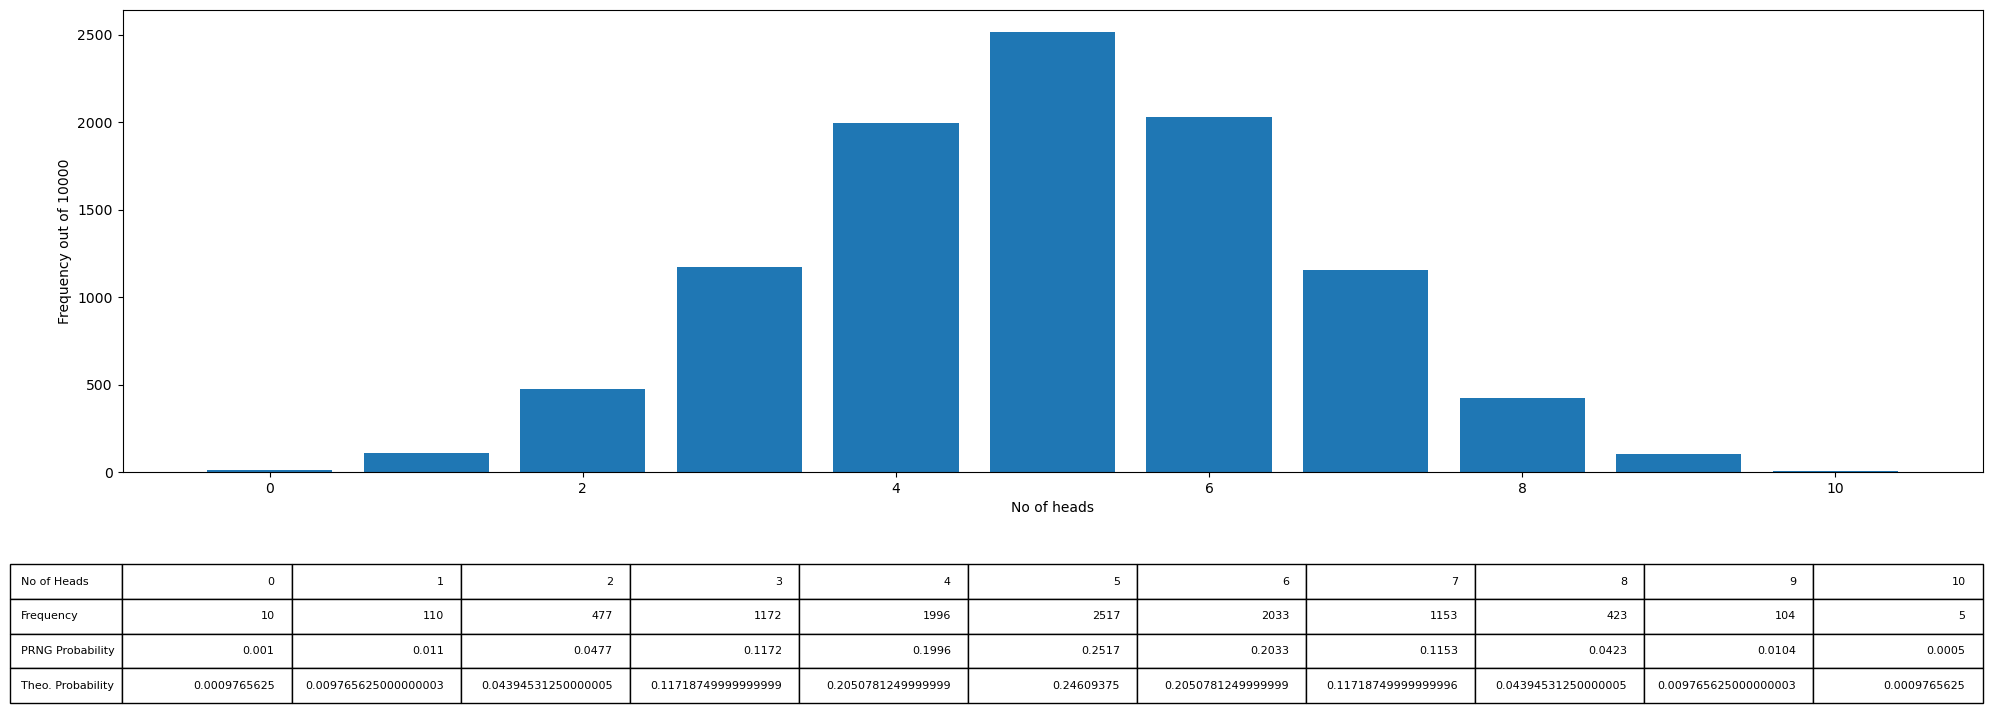

In [31]:
# plt.rcParam['figure.figsize'] = (10,5)
# Module 'matplotlib.pyplot' has no attribute 'rcParam'
plt.figure(figsize=(24,6))
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Theo. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
plt.show()

In [2]:
from scipy.stats import binom

In [3]:
binom.pmf(k=7, n=10, p=.5)

0.11718749999999996

In [9]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

In [25]:
?plt.table

## Exercise 1 :  12C, 13C

In [75]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [76]:
no_of_coins = 27
no_of_heads = flip_coins(no_of_coins, probability = .9889)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 0.00%


In [77]:
no_of_repeats = 10000
result = [flip_coins(no_of_coins=27, probability = .9889) for _ in range(no_of_repeats)]    
no_of_heads, heads_counts = np.unique(result, return_counts=True)     
heads_probability = heads_counts/no_of_repeats                        

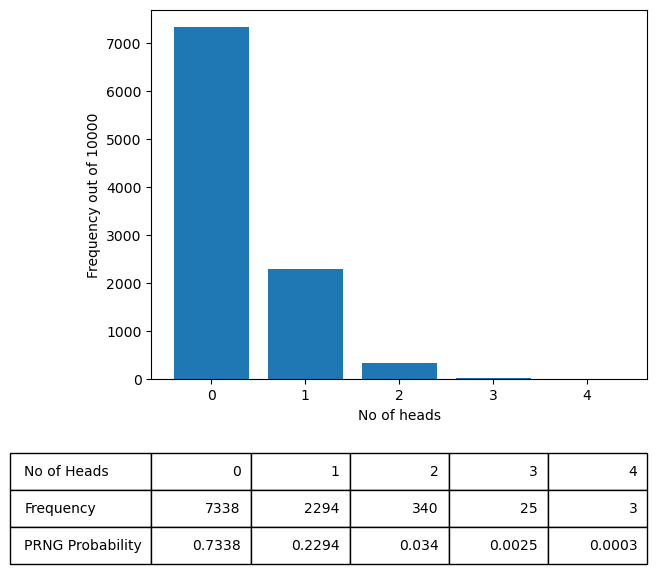

In [78]:
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
plt.show()

In [86]:
mean = sum(no_of_heads * heads_counts)/sum(heads_counts)
print(mean)

0.3061


In [89]:
np.mean(result)

0.3061

In [92]:
standard_deviation = np.sqrt((sum(((no_of_heads-mean)**2)*heads_counts))/sum(heads_counts))
print(standard_deviation) 

0.5468114757391253


In [93]:
np.std(result) # difference in the last decimal place, maybe due to floats.

0.5468114757391254